<div class="alert alert-block alert-success">
<b>Universidad Rey Juan Carlos de Madrid</b>
</div>

<div class="alert alert-block alert-warning">
<b>Biomedical Engineering</b></div>

### 2291 - BIOMEDICAL INFORMATION TRANSMISSION AND CODING SYS - TARDE A - 1
<br>
# Review Theory prior to exam
<br>

### Information

As the probability of an event grows, the information (useful information) decreases.
<br> Thus, an event that barely occurs will contain a lot of information (and so, more bits will be needed to discribe such event). Similarly, an event that is expected to occur will contain no useful information when ocurring (we can predicts it).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


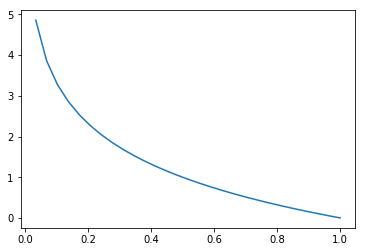

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,30) # p(x)
y = -np.log2(x)
plt.plot(x,y)
plt.show()

But what if we want to know the bits we need (the units of information that will be required to measure all the possible events from a random variable X)? (And was a log chosen to discribe this function?)

## Entropy

In [2]:
import numpy as np
def EntropyH(x):
    u = -x*np.log2(x)-(1-x)*np.log2(1-x)
    return u

EntropyH(0.33) # p and p-1
# try 0.5 and 1 ( note log(0) not supported ;) but thibk of it)

0.91492637277972755

What this function yields is exactly the **minimum** number of bits required on avarage in order to describe a set of events X. Specofically, its outcome will be the expected value of the information:

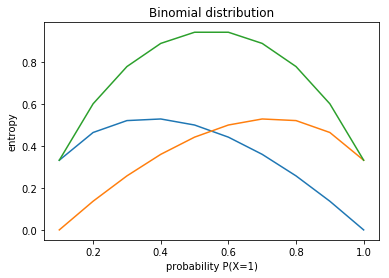

In [3]:
import numpy as np
import matplotlib.pyplot as plt

y1= []
y2=[]
x = np.linspace(0.1,1,10)
x1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] # p
x2 = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1] # 1-p
for i in range(len(x1)):
    u = -x1[i]*np.log2(x1[i])
    y1.append(u)
for i in range(len(x2)):
    u = -x2[i]*np.log2(x2[i])
    y2.append(u)


x3 = []
for i in range(len(x)):
    x_3 = -x1[i]*np.log2(x1[i])-x2[i]*np.log2(x2[i])
    x3.append(x_3)

plt.plot(x,y1)
plt.plot(x,y2)    
plt.plot(x,x3)
plt.title("Binomial distribution")
plt.ylabel("entropy")
plt.xlabel('probability P(X=1)')
plt.show()

* When is the entropy largest?
* When is it easier to predict th result of our set of events X?
* How is the entropy related to the uncertainty? 
* How is the entropy related to the uncertainty?
* Pff.. so what? Why is this even useful?

<details><summary>Answers</summary>
<p>
- The entropy is largest at the middle of the graph, with probability 0.5 for both x1  and x2
<br>
- It is easier to predict the result when the probability of an event is much higher than the rest (at the sides, in this exampe)
<br>
- The entropy is really the uncertainty of what event is going to occur. Obviously, if one event has probability one or almost 1, then the uncertainty will be zero or very close to zero.
<br> 
- As aforesaid, if a set of events can take many events. each with probabilities similar to the other, the probabilities will be largely dispersed along the axis. The entropy will be very large. However, if the probabilities are concentrated in one single event or just a few of them, the entropy (uncertainty) will be very low.
<br>
- Suppose you are to design a code and you want to achieve maximum efficiency in data compression, what is the minimum avarage lenght that your code can have? Note the most likely events will have shorter codewords whereas less likely events will have the longer codewords. This allows for faster data transmission and the entropy tells you exactly what that minimum avarage lenght can be. Now I ask the question: How is such coding system obtained?
</p>
</details>

### Types of Entropies

Review your notes to see the defintion of each one. Here they will be taken into practices. Try also to remember something of *probability and statistcis* course from last year:

<div class="alert alert-block alert-info">
<b>Use MatLab code! </b> I have a MatLab file, in which was easier to program this, named "Entropies.m"
</div>

## Source Coding Algorithms

As we said previously, our main goal is to remove data in order to have the shortest code possible, whose avarage lenght will be lower bounded by the entropy. <br>
Now we take a probability distrinution p and generate a random code of letters from such:

In [4]:
# enter 
p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2]
######################     CODE     #########################
list = []
for i in range(len(p)):
    a= np.random.choice(np.arange(1, len(p)+1), p=p)
    list.append(a)
print(list)

# translating itno letters
firstString = "123456789"
secondString = "abcdefghi"
string = str(list)
translation = string.maketrans(firstString, secondString)
# translate string
list_letters = string.translate(translation)
print(list_letters)
list_letters = list_letters.split(",")

# help from https://www.programiz.com/python-programming/methods/string/maketrans

[5, 5, 4, 5, 4, 3]
[e, e, d, e, d, c]


In [5]:
a = list_letters
code = ''.join(a).replace('[','').replace(']','').replace(' ','')
code

'eededc'

### Run-Lenght Encoding

#### encoding:

In [6]:
def rle_encode(data):
    encoding = ''
    prev_char = ''
    count = 1

    if not data: return ''

    for char in data:
        if char != prev_char:
            # ...then add the count and character
            # to our encoding
            if prev_char:
                encoding += str(count) + prev_char
            count = 1
            prev_char = char
        else:
            # Or increment our counter
            # if the characters do match
            count += 1
    else:
        # Finish off the encoding
        encoding += str(count) + prev_char
        return encoding

In [7]:
encoded_val = rle_encode(code)
print(encoded_val)

2e1d1e1d1c


#### and decoding:

In [8]:
def rle_decode(data):
    decode = ''
    count = ''
    for char in data:
        # If the character is numerical...
        if char.isdigit():
            # ...append it to our count
            count += char
        else:
            # Otherwise we've seen a non-numerical
            # character and need to expand it for
            # the decoding
            decode += char * int(count)
            count = ''
    return decode

In [9]:
decoded_val = rle_decode(encoded_val)
print(decoded_val)

eededc


### LEMPELZIV

#### ctreate a dictionary:

In [10]:
# just started --> trying: https://stackoverflow.com/questions/41336798/lempel-ziv-compression-algorithm-implemention
input_str = decoded_val

keys_dict = {}

ind = 0
inc = 1
while True:
    if not (len(input_str) >= ind+inc):
        break
    sub_str = input_str[ind:ind + inc]
    #print(sub_str,ind,inc)
    if sub_str in keys_dict:
        inc += 1
    else:
        keys_dict[sub_str] = 0
        ind += inc
        inc = 1
        # print 'Adding %s' %sub_str

print((keys_dict))

{'e': 0, 'ed': 0, 'edc': 0}


#### encoding:

In [12]:
import time # checking
input = code
output = []

first = 0
index = 1

list = []

print('input:', input)
print('-------')

while True:
    inp = input[first:index]
    print('reading:', inp)
    if inp == '':
        print('STOP: no thing else to read')
        break
    elif inp not in list:
        print('not found in dictionary!')
        output.append(inp)
        print(inp, 'added', 'current output', output)
        list.append(inp)
        print('current list', list)
        index = index + 1
        first = first + 1
        where = False
    else:
        where = list.index(inp)
        print('found!', 'at', where) # where?
        index = index + 1
        inp = input[first:index]
        list.append(inp)
        first = first + 1
        inp = input[first:index]
        output.append(str(where)+inp)
        print('adding:', str(where)+inp)
        index = index + 1
        first += 1
    print('--------')    
    time.sleep(1)
output

input: eededc
-------
reading: e
not found in dictionary!
e added current output ['e']
current list ['e']
--------
reading: e
found! at 0
adding: 0d
--------
reading: e
found! at 0
adding: 0d
--------
reading: c
not found in dictionary!
c added current output ['e', '0d', '0d', 'c']
current list ['e', 'ed', 'ed', 'c']
--------
reading: 
STOP: no thing else to read


['e', '0d', '0d', 'c']

#### decoding:

In [13]:
encoded = ''.join(output)
print('decoding', encoded, '\n ---------')

list = []
decoded = []

def RepresentsInt(s): # check is string is a number!
    try: 
        int(s)
        return True
    except ValueError:
        return False

correction = 0
for i in range(len(encoded)):
    i = i + correction
    try:
        print('reading:', encoded[i])
    except:
        break
    if RepresentsInt(encoded[i]):
        print('number decoded as:', list[int(encoded[i])], 'from dictionary', list)
        try:            
            decoded.append(list[int(encoded[i])]+encoded[i+1])
            print('adding:', list[int(encoded[i])]+encoded[i+1], 'to (now): ', decoded)
            list.append(list[int(encoded[i])]+encoded[i+1])
            correction = correction + 1
        except:
            decoded.append(list[int(encoded[i])])
            print('adding:', list[int(encoded[i])], 'to (now): ', decoded)
            list.append(list[int(encoded[i])])
        
    elif encoded[i] not in list:
        decoded.append(encoded[i])
        print('adding:', encoded[i], ', to now:', decoded)
        list.append(encoded[i])
        print('dictionary: ', list)
        
    print('---------')
    time.sleep(0.5)
        
decoded

decoding e0d0dc 
 ---------
reading: e
adding: e , to now: ['e']
dictionary:  ['e']
---------
reading: 0
number decoded as: e from dictionary ['e']
adding: ed to (now):  ['e', 'ed']
---------
reading: 0
number decoded as: e from dictionary ['e', 'ed']
adding: ed to (now):  ['e', 'ed', 'ed']
---------
reading: c
adding: c , to now: ['e', 'ed', 'ed', 'c']
dictionary:  ['e', 'ed', 'ed', 'c']
---------


['e', 'ed', 'ed', 'c']

In [14]:
print(''.join(decoded))
print(input)
if ''.join(decoded) == input:
    print('SUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU')
else: 
    print('Ha sido amigo Mursiano...')

eededc
eededc
SUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU


<div class="alert alert-block alert-info">
<b>Author</b> Pablo Laso Mielgo
</div>

To my teacher Luca, whom I hate but love more.